# PreProcessing and Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import import_ipynb
from classification import classification_model

importing Jupyter notebook from classification.ipynb


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
train_length = len(train)
test_col = len(test.columns)

In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,547.00000,547.000000,527.000000,536.000000,504.000000
mean,5272.09872,1618.608995,145.345351,342.649254,0.845238
std,5843.75796,3009.291364,79.854230,65.304435,0.362037
min,150.00000,0.000000,9.000000,12.000000,0.000000
25%,2816.00000,0.000000,100.500000,360.000000,1.000000
50%,3800.00000,1213.000000,128.000000,360.000000,1.000000
75%,5807.50000,2264.500000,170.000000,360.000000,1.000000
max,81000.00000,41667.000000,650.000000,480.000000,1.000000


In [6]:
train['Property_Area'].value_counts()

Semiurban    213
Urban        176
Rural        158
Name: Property_Area, dtype: int64

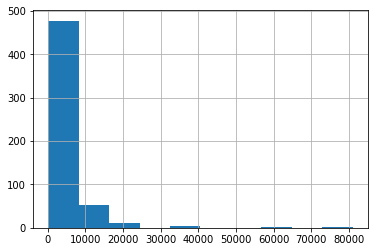

In [7]:
%matplotlib inline

train['ApplicantIncome'].hist()

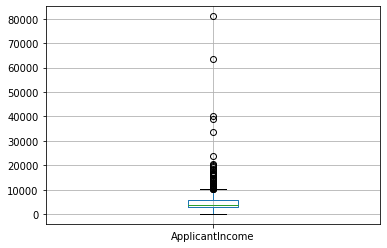

In [8]:
train.boxplot(column='ApplicantIncome')

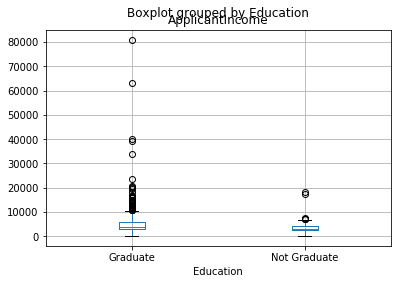

In [9]:
train.boxplot(column='ApplicantIncome', by = 'Education')

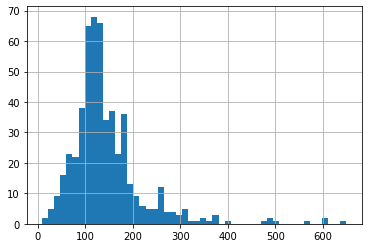

In [10]:
train['LoanAmount'].hist(bins=50)

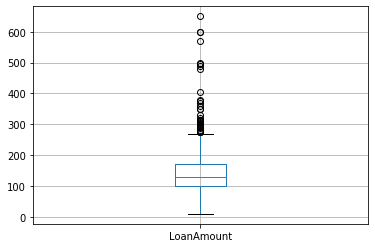

In [11]:
train.boxplot(column='LoanAmount')

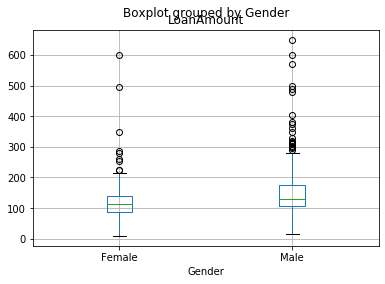

In [12]:
train.boxplot(column='LoanAmount', by = 'Gender')

In [13]:
loan_approval = train['Loan_Status'].value_counts()['Y']
print(loan_approval)

378


In [14]:
pd.crosstab(train ['Credit_History'], train ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,71,7,78
1.0,87,339,426
All,158,346,504


In [15]:
def percentageConvert(ser):
    return ser/float(ser[-1])

# Loan approval rate for customers having Credit_History (1)
approval_on_credit_history=pd.crosstab(train ["Credit_History"], train ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Credit_1 = approval_on_credit_history['Y'][1]
print(loan_approval_with_Credit_1*100)

79.5774647887324


In [16]:
approval_on_credit_history['Y']

Credit_History
0.0    0.089744
1.0    0.795775
All    0.686508
Name: Y, dtype: float64

In [17]:
train['Self_Employed'].fillna('No',inplace=True)

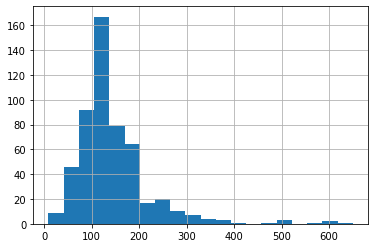

In [18]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
train['LoanAmount'].hist(bins=20)

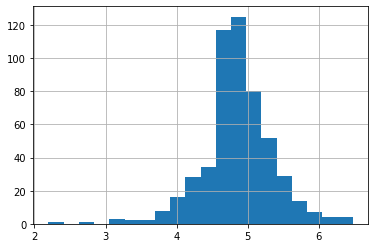

In [19]:
# Perform log transformation of TotalIncome to make it closer to normal
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
train['LoanAmount_log'].hist(bins=20)

In [20]:
# Impute missing values for Gender
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    train[var]=le.fit_transform(train[var].astype('str'))
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

In [21]:
#Create a flag for Train and Test Data set
train['Type']='Train' 
test['Type']='Test'
fullData = pd.concat([train,test],axis=0, sort=True)

#Look at the available missing values in the dataset
fullData.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
Credit_History        7
Dependents            3
Education             0
Gender                4
LoanAmount           22
LoanAmount_log       22
Loan_Amount_Term     14
Loan_ID               0
Loan_Status           0
Married               0
Property_Area         0
Self_Employed         3
TotalIncome          67
Type                  0
dtype: int64

In [22]:
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [23]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

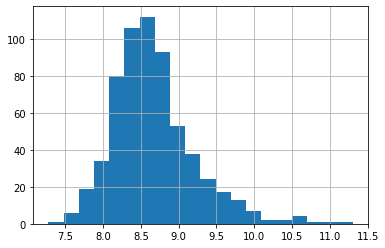

In [24]:
#Create a new column as Total Income

fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']

fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])

#Histogram for Total Income
fullData['TotalIncome_log'].hist(bins=20)

In [25]:
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))

/home/kaushik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [32]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Dependents']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values

In [33]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)
# print(predicted)
#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)
# print(predicted)
#Store it to test dataset
test_modified['Loan_Status']=predicted

outcome_var = 'Loan_Status'

classification_model(model, train,predictors_Logistic,outcome_var)

test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])

Accuracy : 80.804%
Cross-Validation Score : 80.812%


/home/kaushik/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaushik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kaushik/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaushik/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)